# Contrastive analysis
Yeah

In [1]:
import os
import sys

if colab := 'google_colab' in sys.modules:
    from google.colab import drive
    drive.mount("/content/drive")
    # in case we'll do a shared drive, this will have to be changed.
    # For now it is basically a placeholder
    BASE_PATH = "drive/MyDrive/HLT/ProjectAthena/"
    sys.path.insert(0,BASE_PATH)

    !pip install wordcloud
    !pip install -U scikit-learn
    !pip install -U nltk
    !pip install -U seaborn
else:
    BASE_PATH = ".."

In [2]:
# More imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from typing import List, Dict, Optional, Tuple

In [3]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/andrea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/andrea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Using NLTK stopwords
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

## Creating our dataset distribution

In [5]:
df = pd.read_csv(os.path.join(BASE_PATH,'philosophy_data.csv'))
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [6]:
SCHOOLS = df['school'].unique()

In [7]:
# all this mess because .csv saves lists as strings
df['tokenized_txt'] = df['tokenized_txt'].apply(lambda frase: [word.strip('\'') for word in frase[1:-1].split(', ')])

### ~~Space~~ Tokens oddity

We want to create our bag of words, to create the distributions

Modo 1:

In [9]:
from exploration_utils import create_bow

# create a dictionary with the BOW count for each philosophical school,
# in which the stopwords are filtered out
schools_bow_sklearn = {}
for school in SCHOOLS:
    schools_bow_sklearn[school] = create_bow(school=school, dataframe=df, stopwords=stopwords_list)

Modo 2:

In [8]:
# Let's create a BoW for each class, using NLTK and the tokenized_txt column
from itertools import chain

COMPARE = 0

schools_bow = {}
schools_bow_Mk2 = {}
for school in SCHOOLS:
    tokenized_sentences = df.loc[df['school']==school,'tokenized_txt'] 
    schools_bow[school] = nltk.FreqDist([w for w in chain.from_iterable(tokenized_sentences) if w not in stopwords_list])
    
    if COMPARE:
        tokenized_sentences_Mk2 = [nltk.word_tokenize(sent.lower()) for sent in df.loc[df['school']==school,'sentence_str']]
        schools_bow_Mk2[school] = nltk.FreqDist([w for w in chain.from_iterable(tokenized_sentences_Mk2) if w not in stopwords_list])

Are the two methods equal?

In [10]:
nltk_minus_sklearn = {}
sklearn_minus_nltk = {}
for school in SCHOOLS:
    from_nltk = dict(schools_bow[school])
    from_sklearn = schools_bow_sklearn[school]
    print(f'School: {school}, equal: {from_nltk == from_sklearn}')

    print(f"FreqDist's n° elements: {len(from_nltk)}")
    print(f"Length BoW from sklearn's CountVectorizer: {len(from_sklearn)}")

    nltk_minus_sklearn[school] = {k:from_nltk[k] for k in from_nltk.keys() - from_sklearn.keys()}
    sklearn_minus_nltk[school] = {k:from_sklearn[k] for k in from_sklearn.keys() - from_nltk.keys()}
    print(f'In NLTK but not sklearn: {nltk_minus_sklearn[school]}')
    print(f'In sklearn but not NLTK: {sklearn_minus_nltk[school]}')
    print()

School: plato, equal: False
FreqDist's n° elements: 18473
Length BoW from sklearn's CountVectorizer: 18484
In NLTK but not sklearn: {'dikaıon': 1, 'poleos': 1, 'nomesis': 1, 'philanthropia': 1, 'kuon': 1, 'ethonoe': 1, 'oionistic': 2, 'horosa': 1, 'hecaerge': 1, 'mosthai': 1, 'phronesis': 6, 'planeta': 1, 'dioxis': 1, 'aer': 3, 'hudor': 3, 'gnome': 2, 'doxes': 1, 'thelus': 1, 'boulesis': 1, 'entree': 1, 'enantiotes': 1, 'oiesis': 1, 'pteros': 1, 'taxeos': 2, 'zen': 3, 'mneme': 1, 'proteges': 1, 'meden': 1, 'skleroter': 1, 'chremata': 2, 'hektor': 1, 'parakatatheke': 1, 'daemones': 2, 'anthropos': 3, 'enkrates': 1, 'diaıon': 3, 'sophron': 3, 'aner': 1, 'eros': 7, 'nouthetesis': 1, 'oikeiotes': 1, 'sema': 2, 'houtos': 1, 'neuron': 1, 'heone': 1, 'aeitheer': 1, 'sozetai': 1, 'sophronein': 1, 'naıvete': 2, 'chrestotes': 1, 'eleutheriotes': 1, 'ethelemos': 1, 'ateros': 1, 'hesuchei': 1, 'kakophuıa': 1, 'sophistes': 2, 'phones': 1, 'gignoskomenen': 1, 'demegoros': 1, 'hepeısteme': 2, 'seion'

School: german_idealism, equal: False
FreqDist's n° elements: 27975
Length BoW from sklearn's CountVectorizer: 27992
In NLTK but not sklearn: {'': 1, 'jons': 1, 'wohler': 2, 'algebrique': 1, 'gleichgultiges': 1, 'asthetik': 1, 'differentiel': 1, 'degres': 1, 'ursprunglichkeit': 1, 'satze': 1, 'verstandiges': 1, 'bohme': 1, 'numeriques': 2, 'algebriques': 1, 'vollstandiger': 1, 'adaquate': 1, 'reflexions': 4, 'phadon': 1, 'identitat': 1, 'samtliche': 1, 'preestablie': 1, 'jubilaumsausgabe': 1, 'ecrire': 1, 'metaphysique': 3, 'developpons': 1, 'gesprachen': 1, 'wurzburg': 1, 'ausgefuhrte': 1, 'gesprach': 1, 'jahrbucher': 1, 'reduits': 1, 'zoller': 1, 'degages': 1, 'punctualitat': 1, 'superieure': 1, 'beytrage': 1, 'lowe': 1, 'ecole': 3, 'naıve': 3, 'zufalligkeit': 1, 'ursprungliche': 1, 'quantitativitat': 2, 'gobbard': 1, 'quantites': 1, 'nurnberg': 2, 'meme': 1, 'gunter': 1, 'objectivitat': 2, 'evanouissans': 1}
In sklearn but not NLTK: {'rentiel': 1, 'zufa': 1, 'ngliche': 1, 'versta': 

No, they're not. 

I'm pretty sure that part of the reason is because the `create_bow` function uses the column `sentence_str`, so it's `sklearn.CountVectorizer` that does the tokenization. I've checked internally and there are weird characters in some sentences (especially from Plato and Aristotle. Letters with weird accents, that is). Whereas, when building the BoW with `nltk.FreqDist()` method we use already tokenized text, since it uses the `tokenized_txt` column. 

In brief, the tokenizer used to get the `tokenized_txt` column and that of `sklearn.CountVectorizer()` work differently.

Anyway, I'm going with the NLTK way. I may change the `create_bow` function sooner or later.

In [11]:
def dataframe_prober(word:str,
                     school:str):
    subwindow = df.loc[df['school']==school, ['tokenized_txt', 'sentence_str']]
    for i,sentence in zip(subwindow.index,subwindow['tokenized_txt']):
        if word in sentence:
            return(i, subwindow.loc[i,'sentence_str'])

In [12]:
index, sentence = dataframe_prober('wurzburg','german_idealism')
print(f'At index {index}: {sentence}')

At index 267307: To display (Bamberg and Würzburg: at Göbbard's,.


In [13]:
tot_count = 0
for school in SCHOOLS:
    school_count = len(sklearn_minus_nltk[school])+len(nltk_minus_sklearn[school])
    print(f'For the class {school}, total number of "oddities" is {school_count}')
    tot_count += school_count

print(f'Yielding a total of {tot_count} mismatches across all schools')

For the class plato, total number of "oddities" is 439
For the class aristotle, total number of "oddities" is 21
For the class empiricism, total number of "oddities" is 0
For the class rationalism, total number of "oddities" is 0
For the class analytic, total number of "oddities" is 47
For the class continental, total number of "oddities" is 0
For the class phenomenology, total number of "oddities" is 0
For the class german_idealism, total number of "oddities" is 115
For the class communism, total number of "oddities" is 0
For the class capitalism, total number of "oddities" is 0
For the class stoicism, total number of "oddities" is 0
For the class nietzsche, total number of "oddities" is 2
For the class feminism, total number of "oddities" is 0
Yielding a total of 624 mismatches across all schools


So the total number has a really little impact. The words affected by this problem are not many. But it's one thing to consider when building a model.

### Back to business

In [9]:
# Normalize the BoW count to get the distribution of each class
schools_distribution = {}
for school in SCHOOLS:
    schools_distribution[school] = {key:val/schools_bow[school].N() for (key,val) in schools_bow[school].items()}

Let's also get the word distribution for the whole dataset.

In [10]:
overall_bow = nltk.FreqDist([w for w in chain.from_iterable(df['tokenized_txt']) if (w not in stopwords_list and w.isalnum())])

threshold = 0   # 0.01
total_mass = sum(overall_bow.values())  # overall_bow.N()
lower_bound = threshold*total_mass

philosophy_distribution = {key:val/total_mass for (key,val) in overall_bow.items() if val>threshold}

In [11]:
overall_bow.most_common(20)

[('one', 48216),
 ('would', 24171),
 ('must', 21140),
 ('things', 17482),
 ('also', 16781),
 ('may', 16298),
 ('man', 16152),
 ('time', 15307),
 ('us', 15100),
 ('even', 14461),
 ('first', 13880),
 ('say', 12856),
 ('way', 12854),
 ('nature', 12796),
 ('two', 12474),
 ('world', 12088),
 ('therefore', 11722),
 ('reason', 11464),
 ('without', 11432),
 ('thing', 11275)]

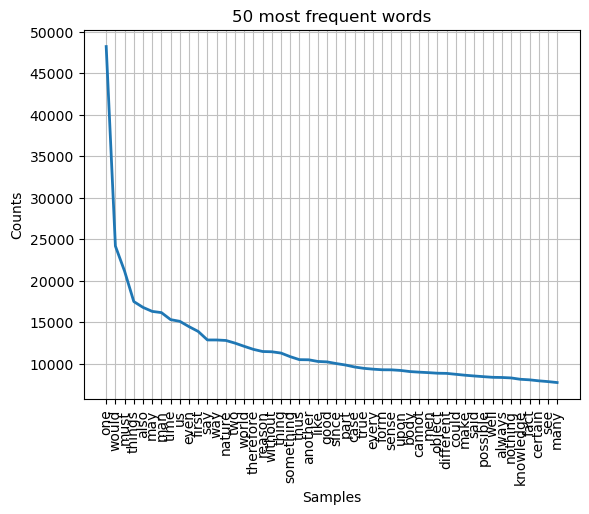

<Axes: title={'center': '50 most frequent words'}, xlabel='Samples', ylabel='Counts'>

In [12]:
overall_bow.plot(50,title='50 most frequent words')

## Distributions comparison

Our contrastive analysis is with three corpora. **Altri discorsi.**

### Gutenberg corpus

In [13]:
# Caution! This saves things locally!
# Just needs to be executed once (or once in a while, to update)
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/andrea/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [14]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Upon inspection, the Gutenberg corpus is pretty clean. However, each file has those annoying headers. In the great scheme of things, they aren't very meaningful.

In [15]:
filtered_words = []
threshold = 0  #0.05
for filename in gutenberg.fileids():
    words_list = gutenberg.words(filename)
    # We filter away stopwords and non-alphanumeric words
    # We also remove the trailing header
    filtered_words.append([w for w in words_list[words_list.index(']'):] if (w.lower() not in stopwords_list and w.isalnum())])

gutenberg_freq_dist = nltk.FreqDist([w for w in chain.from_iterable(filtered_words)])

# We could remove the rarest words
total_mass = sum(gutenberg_freq_dist.values())  # gutenberg_freq_dist.N()
lower_bound = threshold*total_mass
gutenberg_distribution = {k:v/total_mass for (k,v) in gutenberg_freq_dist.items() if v>lower_bound}

Let's now compare the distribution of our dataset with the one from the Gutenberg corpus.

The comparison I propose can be described as follows:
- The two distribution's supports will have some overlapping. That is, they'll share part of the vocabulary
- For both distributions, we compute the amount of shared mass. That is, how much mass lies on the shared support. This is a measure of "how much they have in common"
- We can see the distributions restricted to the common support as vectors, of course. So,
    - We compute the $l_2$ distance between the vectors (aka the two distributions on the shared support).
    - We compute the cosine of the angle (aka cosine similarity (cringe name btw)) between the two vectors

This should give a nice view at a glance of "how similar they are" in the part of the vocabulary which is in common.

In [16]:
# shared support: words present in both corpora
shared_support = [k for k in philosophy_distribution.keys() if k in gutenberg_distribution.keys()]

shared_mass_philosophy, shared_mass_gutenberg = 0,0 
distance, norm_philosophy, norm_gutenberg, dot = 0,0,0,0
for w in shared_support:
    phil, gut = philosophy_distribution[w], gutenberg_distribution[w]
    shared_mass_philosophy += phil
    shared_mass_gutenberg += gut

    # compute the angle
    dot += phil*gut
    norm_philosophy += phil**2
    norm_gutenberg += gut**2

    # distance between the sequences
    distance += (phil-gut)**2

norm_philosophy = np.sqrt(norm_philosophy)
norm_gutenberg = np.sqrt(norm_gutenberg)
distance = np.sqrt(distance)  

print(f'{100*shared_mass_philosophy:2.2f}% of the words in the philosophy corpus are shared with the gutenberg corpus')
print(f'{100*shared_mass_gutenberg:2.2f}% of the words in the Gutenberg corpus are shared with our philosophy corpus')
print(f'The distance of the two distributions (on the shared portion of the support) is {distance:.4e}')
print(f'The cosine similarity between the two distributions (on the shared portion of the support) is {dot/(norm_philosophy*norm_gutenberg):.4f}')

89.84% of the words in the philosophy corpus are shared with the gutenberg corpus
78.41% of the words in the Gutenberg corpus are shared with our philosophy corpus
The distance of the two distributions (on the shared portion of the support) is 2.6482e-02
The cosine similarity between the two distributions (on the shared portion of the support) is 0.5845


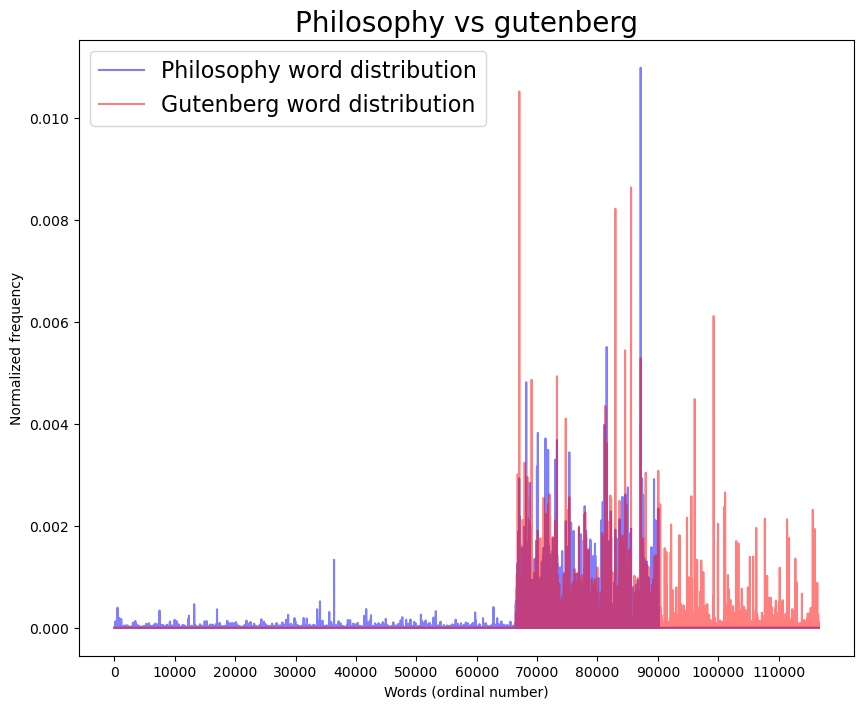

In [17]:
from exploration_utils import save_plot, plot_superimposed_distributions

RANGE = 100000

#fig, ax = plt.subplots(figsize=(10,12))
plot_superimposed_distributions(philosophy_distribution,
                                        gutenberg_distribution,
                                        label1='Philosophy word distribution',
                                        label2='Gutenberg word distribution',
                                        distribution1='philosophy',
                                        distribution2='gutenberg',)
                                        #range=RANGE)
#save_plot(plt, 'philosophy_vs_gutenberg_distributions')
plt.show()

### Brown Corpus

In [18]:
# Caution! This saves things locally!
# Just needs to be executed once (or once in a while, to update)
nltk.download('brown')

[nltk_data] Downloading package brown to /home/andrea/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [19]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [20]:
print(f'The Brown corpus consists of {len(brown.words())} words')

The Brown corpus consists of 1161192 words


In [21]:
# word frequencies per category
brown_words_per_cat, brown_distribution = {}, {}
cat_checks = [True]

threshold = 0      #0.05
verbose = 0
for category in brown.categories():
    # We first filter away stopwords and non-alphanumeric words
    # (We don't want to compare the usage of stopwords in our dataset 
    # and in the Brown corpus. We already know they'll be sharing 
    # a lot of that mass...)
    filtered_words = [w for w in brown.words(categories=category) if (w.lower() not in stopwords_list and w.isalnum())]
    
    # I compare lowercase letters because we're just interested in counts/frequencies.
    # Maybe capitalizing some words may convey meaning, but it's something for
    # the classifiers, not this analysis.   
    freq_dist = nltk.FreqDist(w.lower() for w in filtered_words)
    
    # We may want to discard words that are too infrequent
    total_mass = sum(freq_dist.values())    #freq_dist.N()
    lower_bound = threshold*total_mass    
    brown_words_per_cat[category] = nltk.FreqDist({k:v for (k,v) in freq_dist.items() if v>lower_bound})

    # Normalize
    brown_distribution[category] = {key:val/brown_words_per_cat[category].N() for (key,val) in brown_words_per_cat[category].items()}

    if verbose: 
        checks = len(filtered_words)==total_mass, sum(brown_distribution[category].values())==1
        print(f'category: {category}, n° words: {len(filtered_words)}')
        print(f'There are capitalized words: {any([w.lower()!=w for w in filtered_words])}')
        print(f'Total counts (in the freq_dist FreqDist object): {total_mass}, matches n° of words (as it must be): {checks[0]}')
        print(f'Lower bound is {lower_bound}')
        print(f'Unitary mass in distribution: {checks[1]}')
        print()
        cat_checks.append(all(checks))

assert all(cat_checks)
print('All is well')


All is well


Let's now compare the distributions we have for our data with the ones we have for each category in the Brown corpus.

We use the same approach we used for the Gutenberg corpus.

In [22]:
shared_support, shared_mass_philosophy, shared_mass_brown = {},{},{}
dot, norm_philosophy, norm_brown, distance = {},{},{},{}

for category in brown.categories():
    shared_support[category] = [k for k in philosophy_distribution.keys() if k in brown_distribution[category].keys()]

    shared_mass_philosophy[category], shared_mass_brown[category], distance[category] = 0,0,0
    norm_brown[category], norm_philosophy[category], dot[category] = 0,0,0

    for w in shared_support[category]:
        phil, brwn = philosophy_distribution[w], brown_distribution[category][w]
        shared_mass_philosophy[category] += phil
        shared_mass_brown[category] += brwn

        # angle
        dot[category] += phil*brwn
        norm_philosophy[category] += phil**2
        norm_brown[category] += brwn**2      

        # distance
        distance[category] += (phil-brwn)**2

    norm_philosophy[category] = np.sqrt(norm_philosophy[category])
    norm_brown[category] = np.sqrt(norm_brown[category])
    distance[category] = np.sqrt(distance[category])

    print(f'Category {category} of the Brown corpus:')
    print(f'\t{100*shared_mass_philosophy[category]:2.2f}% of the words in the philosophy corpus are shared with the Brown corpus (for category {category})')
    print(f'\t{100*shared_mass_brown[category]:2.2f}% of the words in the Brown corpus are shared with our philosophy corpus (for category {category})')
    print(f'\tDistance: {distance[category]:.4e}')
    print(f'\tCosine similarity: {dot[category]/(norm_philosophy[category]*norm_brown[category]):.4f}')
    print()

Category adventure of the Brown corpus:
	62.57% of the words in the philosophy corpus are shared with the Brown corpus (for category adventure)
	92.43% of the words in the Brown corpus are shared with our philosophy corpus (for category adventure)
	Distance: 2.6281e-02
	Cosine similarity: 0.5886

Category belles_lettres of the Brown corpus:
	85.45% of the words in the philosophy corpus are shared with the Brown corpus (for category belles_lettres)
	94.72% of the words in the Brown corpus are shared with our philosophy corpus (for category belles_lettres)
	Distance: 1.6232e-02
	Cosine similarity: 0.8226

Category editorial of the Brown corpus:
	73.29% of the words in the philosophy corpus are shared with the Brown corpus (for category editorial)
	93.76% of the words in the Brown corpus are shared with our philosophy corpus (for category editorial)
	Distance: 2.0718e-02
	Cosine similarity: 0.6994

Category fiction of the Brown corpus:
	65.81% of the words in the philosophy corpus are sha

What if we want to plot this? Could we do it? How?? Fear not!!

In [23]:
# Function that plots the two distributions (contrastive analysis)
def plot_superimposed_distributions_cell(bag_of_words1, 
                                    bag_of_words2,
                                    ax=None,
                                    **kwargs):
    """Plot the superimposed distributions of two bags of words.

    Args:
        bag_of_words1 (dict): First bag of words.
        bag_of_words2 (dict): Second bag of words.
        **kwargs: Additional keyword arguments for customization.
            range (int): Range for x-axis ticks.
            color1 (str): Color for the first distribution plot.
            color2 (str): Color for the second distribution plot.
            label1 (str): Label for the first distribution plot.
            label2 (str): Label for the second distribution plot.
            distribution1 (str): Name of the first distribution.
            distribution2 (str): Name of the second distribution.

    Returns:
        ax (matplotlib.axes.Axes): The created ax of the figure.
    """    
    
    RANGE = kwargs.get('range', kwargs.get('RANGE',0))
    # Combine the vocabularies of both bags of words
    if RANGE:     
        shared_support = {k for (_,k) in zip(range(RANGE),bag_of_words1.keys())}&{k for (_,k) in zip(range(RANGE),bag_of_words2.keys())}
        exclusive_words1 = {k for (_,k) in zip(range(RANGE),bag_of_words1.keys())} - shared_support
        exclusive_words2 = {k for (_,k) in zip(range(RANGE),bag_of_words2.keys())} - shared_support                         
    else:
        shared_support = set(bag_of_words1.keys()) & set(bag_of_words2.keys())
        exclusive_words1 = set(bag_of_words1.keys()) - shared_support
        exclusive_words2 = set(bag_of_words2.keys()) - shared_support

    # isolate the exclusive words, and the shared part
    all_words = list(exclusive_words1) + list(shared_support) + list(exclusive_words2)

    # Get frequencies of each word in the "merged" bag of words
    freq1 = [bag_of_words1.get(word,0) for word in all_words]
    freq2 = [bag_of_words2.get(word,0) for word in all_words]

    # Plot the two distributions
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 8))
    ax.plot(range(len(all_words)), freq1, color=kwargs.get('color1','b'), alpha=0.5, label=kwargs.get('label1','Bag of Words 1'))
    ax.plot(range(len(all_words)), freq2, color=kwargs.get('color2','r'), alpha=0.5, label=kwargs.get('label2','Bag of Words 2'))
    
    ax.set_xlabel('Words (ordinal number)')
    ax.set_ylabel('Normalized frequency')
    step = 10**round(np.log10(len(all_words)/10))
    ax.set_xticks(np.arange(0, len(all_words), step))
    ax.set_xticklabels(np.arange(0, len(all_words), step))

    # Create the title string if both distributions are provided
    distribution1 = kwargs.get("distribution1", "")
    distribution2 = kwargs.get("distribution2", "")
    title_string = f'{distribution1.capitalize()} vs {distribution2}' if (distribution1 and distribution2) else 'Superimposed distributions'

    ax.set_title(title_string, fontsize=20)
    ax.legend(fontsize=16)

    return ax   

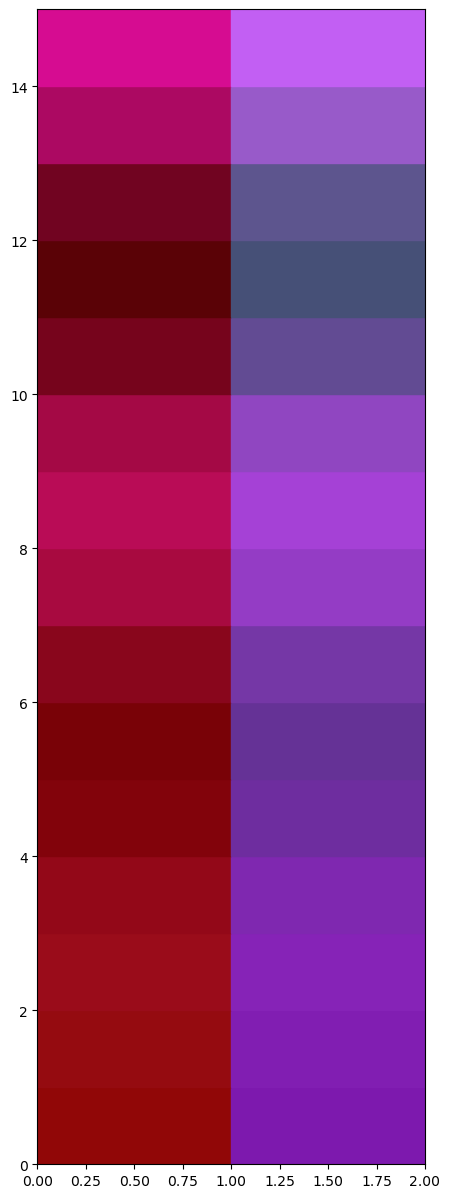

In [41]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1, 1, figsize=(5, len(brown.categories())))

for i in range(len(brown.categories())):
    color1 = (145+5*i*np.sin(i))/255,(7+5*np.sin(i))/255,(7+5*i*(np.sin(i)+0.974))/255
    color2 = (125+5*i*np.sin(i))/255,(25+5*i)/255,(174+5*i*np.sin(i))/255
    ax.add_patch(Rectangle((0, i), 1, 1, color=color1))
    ax.add_patch(Rectangle((1, i), 1, 1, color=color2))

ax.set_xlim([0, 2])
ax.set_ylim([0, len(brown.categories())])
plt.show()

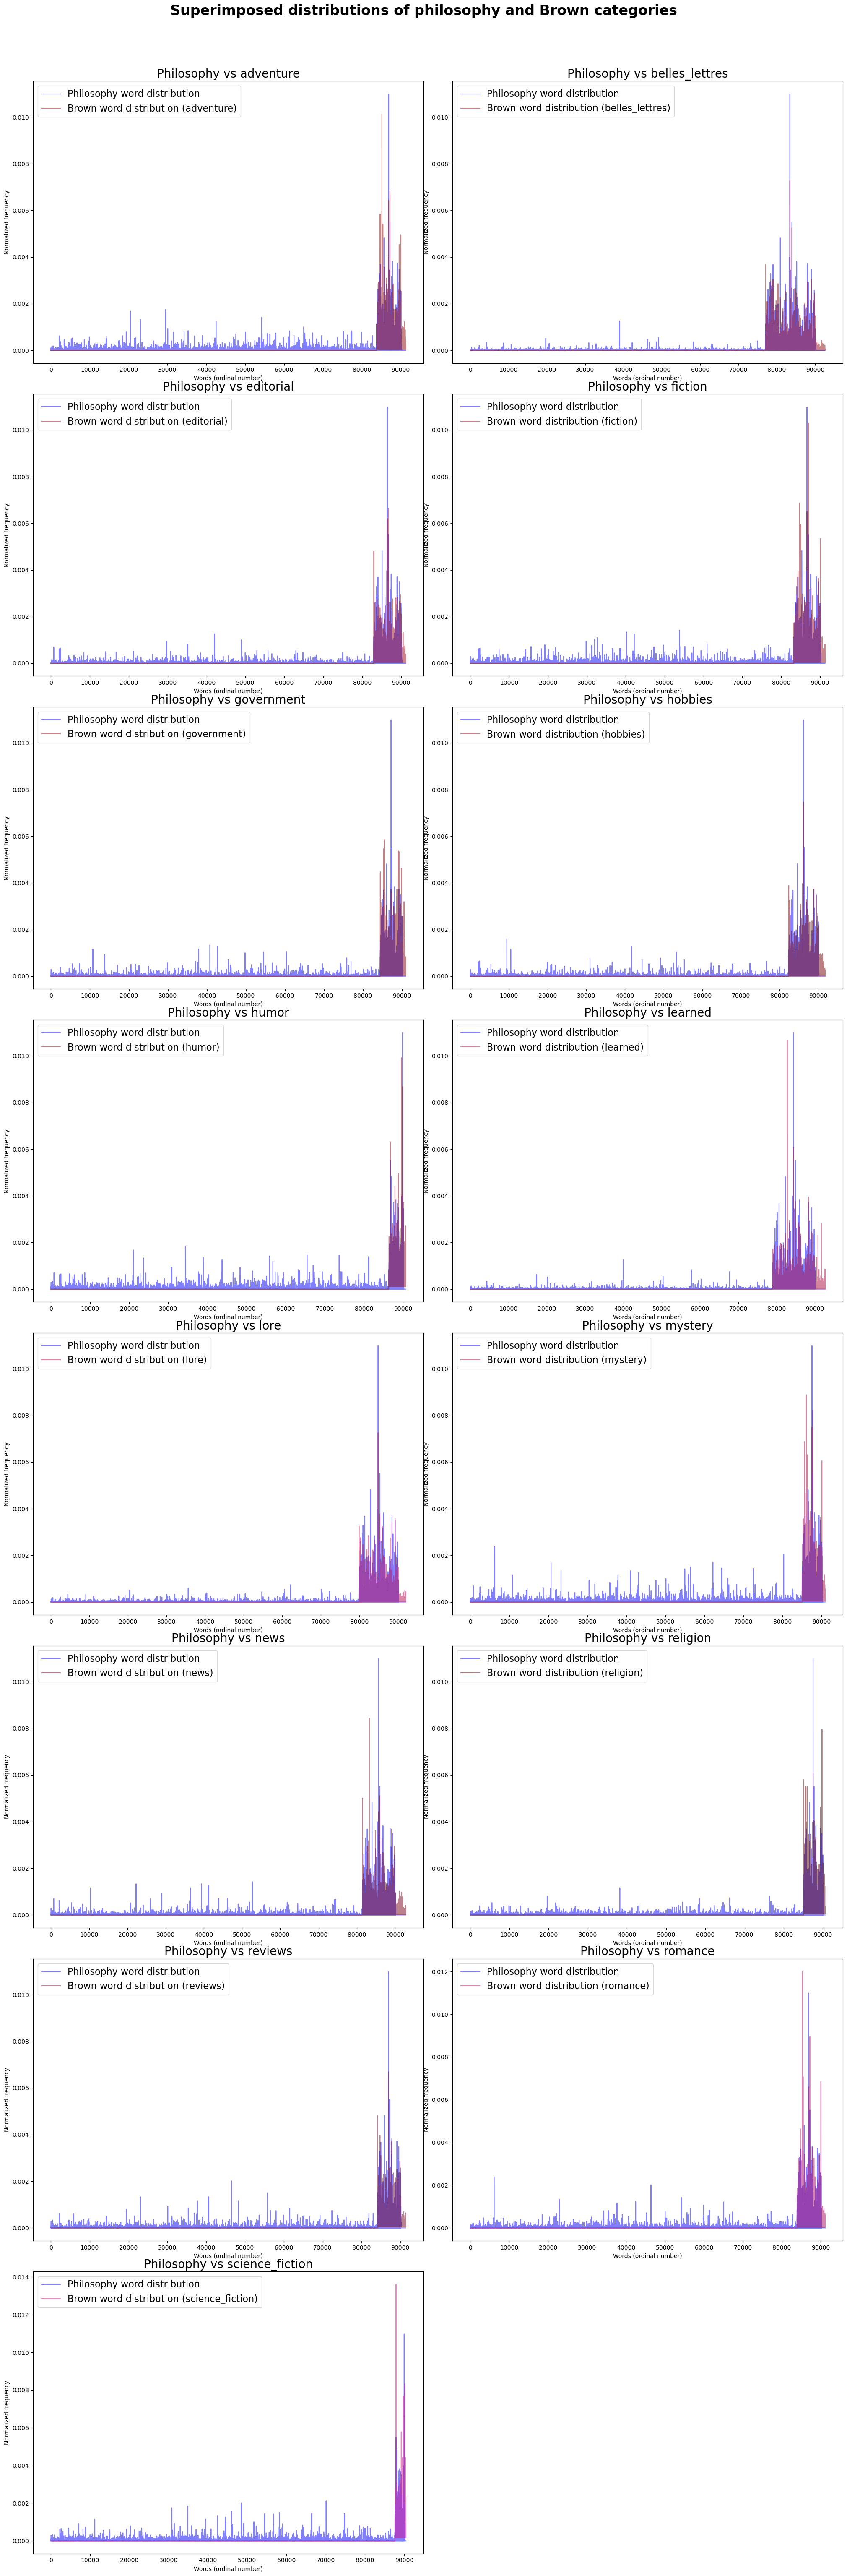

In [42]:
fig, axs = plt.subplots(8,2,figsize=(20,60))
axs = axs.ravel()

for i,category in enumerate(brown.categories()):
    plot_superimposed_distributions(philosophy_distribution, 
                                            brown_distribution[category],
                                            label1='Philosophy word distribution',
                                            label2=f'Brown word distribution ({category})',
                                            distribution1='philosophy',
                                            distribution2=f'{category}',
                                            color2=((145+5*i*np.sin(i))/255,(7+5*np.sin(i))/255,(7+5*i*(np.sin(i)+0.974))/255),
                                            ax=axs[i])

for i in range(len(brown.categories()),16):
    axs[i].axis('off')

plt.suptitle('Superimposed distributions of philosophy and Brown categories', fontsize=24, y=1.02, fontweight='bold')
plt.tight_layout(pad=0)
save_plot(plt, 'philosophy_vs_brown_distributions') 
plt.show()

**VERY OPTIONAL**: a nice plot (with subplots), with the overlapping distributions.

### Simple english wikipedia corpus